In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [25]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [26]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\Resized_1500'

In [27]:
img = os.listdir(img_dir)
type(img)

list

In [28]:
df1 = pd.DataFrame()

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df1['filename'] = img

In [31]:
len(df1)

1520

In [32]:
df1['label'] = 'Diabetic_Retinopathy'
df1

,filename,label
0,1000_left.jpeg,Diabetic_Retinopathy
1,1000_right.jpeg,Diabetic_Retinopathy
2,1002_left.jpeg,Diabetic_Retinopathy
3,1002_right.jpeg,Diabetic_Retinopathy
4,1008_left.jpeg,Diabetic_Retinopathy
...,...,...
1515,997_right.jpeg,Diabetic_Retinopathy
1516,998_left.jpeg,Diabetic_Retinopathy
1517,998_right.jpeg,Diabetic_Retinopathy
1518,99_left.jpeg,Diabetic_Retinopathy


In [33]:
df1 = df1.sample(1520)

In [34]:
df1

,filename,label
1116,551_left.jpeg,Diabetic_Retinopathy
365,1422_right.jpeg,Diabetic_Retinopathy
816,225_left.jpeg,Diabetic_Retinopathy
474,1552_left.jpeg,Diabetic_Retinopathy
934,352_left.jpeg,Diabetic_Retinopathy
...,...,...
179,1192_right.jpeg,Diabetic_Retinopathy
575,1669_right.jpeg,Diabetic_Retinopathy
348,1408_left.jpeg,Diabetic_Retinopathy
1347,802_right.jpeg,Diabetic_Retinopathy


In [35]:
df = pd.read_csv("full_df.csv")
df.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
2431,3330,49,Male,3330_left.jpg,3330_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3330_right.jpg
3705,596,52,Male,596_left.jpg,596_right.jpg,epiretinal membrane，drusen,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",596_left.jpg
3427,271,46,Male,271_left.jpg,271_right.jpg,branch retinal vein occlusion,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",271_left.jpg
2608,4009,60,Male,4009_left.jpg,4009_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4009_right.jpg
2025,2888,14,Female,2888_left.jpg,2888_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2888_right.jpg


In [36]:
img_dir1 = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [37]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [38]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [39]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [40]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [41]:
len(df_nor_filenames)

5501

In [42]:
df_nor_filenames = df_nor_filenames.sample(1520)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0     3142_left.jpg
1     3009_left.jpg
2      521_left.jpg
3      241_left.jpg
4    2511_right.jpg
dtype: object

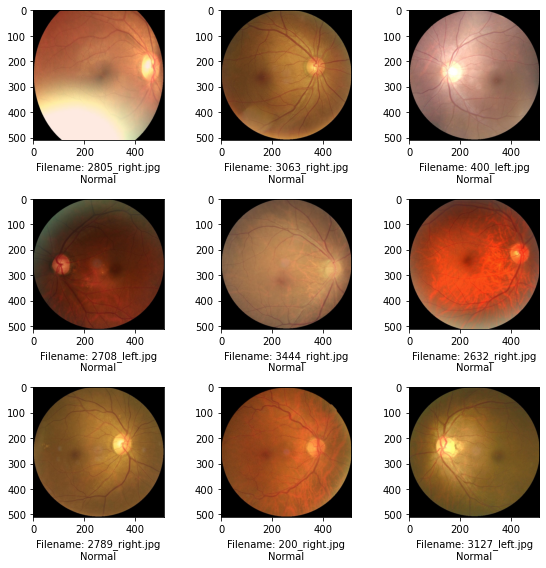

In [43]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir1, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [45]:
df_dr_filenames = df1['filename']
df_dr_filenames = df_dr_filenames.reset_index(drop=True)
df_dr_filenames

0         551_left.jpeg
1       1422_right.jpeg
2         225_left.jpeg
3        1552_left.jpeg
4         352_left.jpeg
             ...       
1515    1192_right.jpeg
1516    1669_right.jpeg
1517     1408_left.jpeg
1518     802_right.jpeg
1519     914_right.jpeg
Name: filename, Length: 1520, dtype: object

In [46]:
img_dir

'C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500'

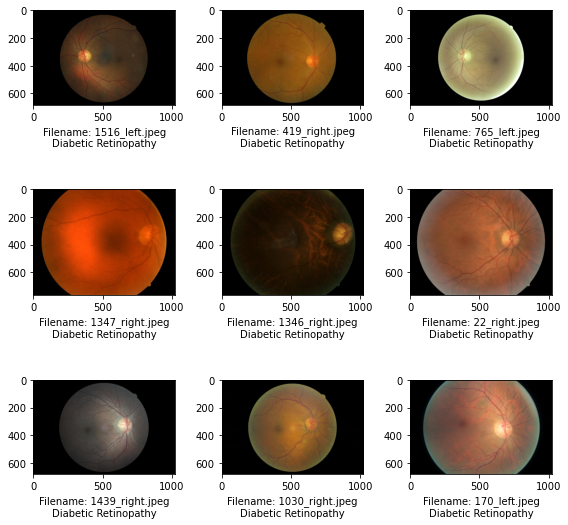

In [49]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_dr_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Diabetic Retinopathy'.format(df_dr_filenames[i+9]))
    
plt.tight_layout()

In [51]:
df_dr_filenames = df1

In [52]:
df_dr_filenames

,filename,label
1116,551_left.jpeg,Diabetic_Retinopathy
365,1422_right.jpeg,Diabetic_Retinopathy
816,225_left.jpeg,Diabetic_Retinopathy
474,1552_left.jpeg,Diabetic_Retinopathy
934,352_left.jpeg,Diabetic_Retinopathy
...,...,...
179,1192_right.jpeg,Diabetic_Retinopathy
575,1669_right.jpeg,Diabetic_Retinopathy
348,1408_left.jpeg,Diabetic_Retinopathy
1347,802_right.jpeg,Diabetic_Retinopathy


In [54]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames

,filename,label
0,3142_left.jpg,normal
1,3009_left.jpg,normal
2,521_left.jpg,normal
3,241_left.jpg,normal
4,2511_right.jpg,normal
...,...,...
1515,848_right.jpg,normal
1516,3320_right.jpg,normal
1517,1515_right.jpg,normal
1518,3379_left.jpg,normal


In [55]:
df_combined = df_dr_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,551_left.jpeg,Diabetic_Retinopathy
1,1422_right.jpeg,Diabetic_Retinopathy
2,225_left.jpeg,Diabetic_Retinopathy
3,1552_left.jpeg,Diabetic_Retinopathy
4,352_left.jpeg,Diabetic_Retinopathy
...,...,...
3035,848_right.jpg,normal
3036,3320_right.jpg,normal
3037,1515_right.jpg,normal
3038,3379_left.jpg,normal


In [57]:
df_combined = df_combined.sample(3040)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,2482_left.jpg,normal
1,1752_left.jpeg,Diabetic_Retinopathy
2,2879_right.jpg,normal
3,644_right.jpeg,Diabetic_Retinopathy
4,639_left.jpeg,Diabetic_Retinopathy
...,...,...
3035,2722_right.jpg,normal
3036,670_right.jpeg,Diabetic_Retinopathy
3037,3977_right.jpg,normal
3038,3178_left.jpg,normal


In [58]:
a  = np.array(df_combined.filename)

In [59]:
a.shape

(3040,)

In [62]:
a[5]

'4261_left.jpg'

In [77]:
paths = []

In [61]:
type(paths)

list

In [63]:
d1 = []
d2 = []

In [64]:
for i in range(3040):
    img = a[i]
    if 'jpg' in img:
        image = os.path.join(img_dir1, img)
        d1.append(image)
    else:
        image = os.path.join(img_dir, img)
        d2.append(image)

In [65]:
len(d1)

1520

In [66]:
len(d2)

1520

In [75]:
d1[:5]

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2482_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2879_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4261_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2952_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1490_left.jpg']

In [74]:
d2[:5]

['C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500\\1752_left.jpeg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500\\644_right.jpeg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500\\639_left.jpeg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500\\1285_left.jpeg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\Resized_1500\\66_right.jpeg']

In [70]:
len(d1+d2)

3040

In [80]:
for i in range(3040):
    img = a[i]
    if 'jpg' in img:
        image = os.path.join(img_dir1, img)
        paths.append(image)
    else:
        image = os.path.join(img_dir, img)
        paths.append(image)

In [81]:
len(paths)

3040

In [82]:
data = []

In [83]:
for i in range(3040):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [84]:
type(data)

list

In [86]:
data = np.array(data)

In [87]:
data.shape

(3040, 224, 224, 3)

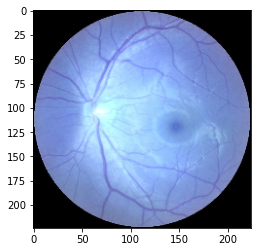

In [88]:
plt.imshow(data[0])

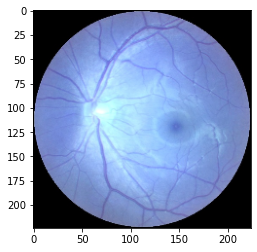

In [89]:
plt.imshow(data[0]/255)

## Scaling the Dataset in the range 0-1

In [90]:
data = data/255

In [92]:
x = data
y = []
for i in df_combined.label:
    if(i=='Diabetic_Retinopathy'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [93]:
print(type(x))
print(type(y))
print(len(x))
print(len(y))
y[:5]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3040
3040


array([0, 1, 0, 1, 1])

## Splitting the dataset into Train, Test, Val

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

2584
228
228


## MobileNet V2 Model

In [98]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [99]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [100]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [101]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
81/81 [==============================] - 87s 989ms/step - loss: 0.2316 - accuracy: 0.9141
Epoch 2/5
81/81 [==============================] - 64s 783ms/step - loss: 0.0818 - accuracy: 0.9814
Epoch 3/5
81/81 [==============================] - 47s 585ms/step - loss: 0.0555 - accuracy: 0.9896
Epoch 4/5
81/81 [==============================] - 47s 583ms/step - loss: 0.0422 - accuracy: 0.9930
Epoch 5/5
81/81 [==============================] - 47s 584ms/step - loss: 0.0336 - accuracy: 0.9950


In [102]:
model.evaluate(x_val,y_val)

8/8 [==============================] - 4s 412ms/step - loss: 0.0815 - accuracy: 0.9868


[0.08145657181739807, 0.9868420958518982]

In [103]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 3s 393ms/step - loss: 0.0622 - accuracy: 0.9781


[0.06222904101014137, 0.9780701994895935]

In [104]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.98      0.97      0.98       107

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

